# Potential theory

Complex analysis is a useful lens through which to view much of approximation theory, particularly when it comes to spectral methods.

The error in polynomial interpolation includes the factor

$$
\Phi(x) = \prod_{j=0}^N (x-x_j), 
$$

where the $x_j$ are the interpolation nodes. Taking the log of the modulus yields

$$
\log |\Phi(x)| = \sum_{j=0}^N \log|x-x_j|.  
$$

This motivates us to define 

$$
\phi_N(z) = \frac{1}{N} \sum_{j=0}^N \log|z-x_j|,  
$$

which is harmonic in the complex plane except at the $x_j$. There is a compelling physical interpretation of $\phi_N$ as the electrostatic potential due to point charges in the plane. (A point charge in the plane corresponds to a line of charge in 3D space, which turns the electrostatic force into $O(|z-x_j|^{-1}$).) 

Things get interesting in the limit $N\to \infty$. The point charges on $[-1,1]$ become a charge density $\rho(x)$. If we normalize $\int_{-1}^1 \rho(x)\, dx$ to be 1, then 

$$
\int_a^b \rho(x)\, dx
$$

is the fraction of the nodes that lies in the subinterval $[a,b]$. For equispaced points, $\rho(x)=\tfrac{1}{2}$. For Chebyshev points, 

$$
\rho(x) = \frac{1}{\pi\sqrt{1-x^2}}. 
$$

## Key theorem

The potential due to a charge density $\rho$ is 

$$
\phi(z) = \int_{-1}^1 \rho(x)\log|z-x|\, dx. 
$$

::::{prf:theorem} Polynomial potential theory
Suppose that sets of $N$ interpolation points $\{x_j\}$ are given that converge to density function $\rho(x)$ as $N\to \infty$. Define the potential $\phi$ as above, and let 

$$
M = \sup_{x\in[-1,1]} \phi(x).
$$

Suppose a function $u$ is analytic throughout the region 

$$
\left\{ z\in \mathbb{C}: \phi(z) \le \phi_u \right\}, 
$$

where $\phi_u > M$ is a constant, and let $p_N$ be the polynomial that interpolates $u$ at the $\{x_j\}$ for that $N$. Then there exists a constant $C>0$ such that

$$
|u(x) - p_N(x)| \le C \exp\left[ -N(\phi_u-M) \right], 
$$

for all $x\in[-1,1]$ and all $N>0$. The same estimate holds, for a different constant $C$, for any derivative, $|u^{(d)}(x) - p_N^{(d)}(x)|$. 
::::

The theorem promises exponential/geometric convergence over $[-1,1]$ as a function of $N$, provided $u$ is analytic throughout some region in $\mathbb{C}$ that contains the interval. 

### p10: polynomials and corresponding equipotential curves

In [1]:
using Polynomials

N = 16
data = [
    (@. -1 + 2*(0:N)/N, "equispaced points"),
    (@. cospi((0:N)/N), "Chebyshev points"),
]

xx = -1:0.005:1
xc = -1.4:0.02:1.4
yc = -1.12:0.02:1.12
results = []
for (i,(x,label)) in enumerate(data)
    p = fromroots(x)
    pp = p.(xx)
    pz = [p(x + 1im*y) for x in xc, y in yc]
    push!(results, (;x,pp,pz,label))
end

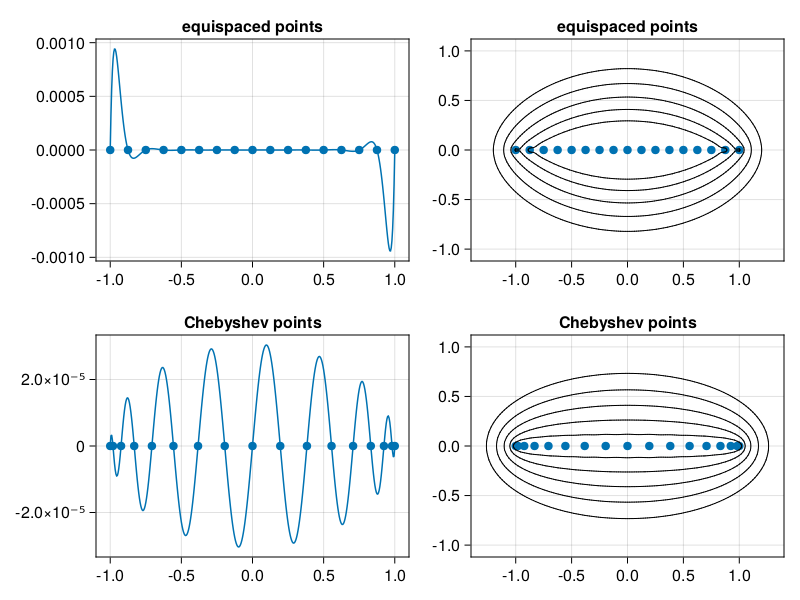

In [2]:
using CairoMakie

fig = Figure()
levels = 10.0 .^ (-4:0)
for (i,r) in enumerate(results)
    Axis(fig[i, 1], xticks=-1:0.5:1, title=r.label)
    scatter!(r.x, zero(r.x))
    lines!(xx, r.pp)
    
    Axis(fig[i, 2], xticks=-1:0.5:1, title=r.label)
    scatter!(r.x, zero(r.x))
    contour!(xc, yc, abs.(r.pz); levels, color=:black)
    limits!(-1.4, 1.4, -1.12, 1.12)
end
fig

The left column of plots shows $\Phi(x)$, while the right column shows the level curves of $\phi$, for both equispaced and Chebyshev points.

### Equispaced points

A little elbow grease shows that 

$$
\phi(z) = -1 + \frac{1}{2}\text{Re}\left[ (z+1)\log(z+1)-(z-1)\log(z-1) \right]. 
$$

In particular, $\phi(0)=-1$ and $\phi(\pm1) = -1 + \log 2$. Since $|\Phi(x)|\approx \exp\bigl(N\phi(x)\bigr)$, we find that

$$
\frac{|\Phi(\pm1)|}{|\Phi(0)|} = 2^N. 
$$

Furthermore, the smallest contour curve of $\phi$ that contains $[-1,1]$ also contains a significant additional part of the complex plane, requiring "hidden" analyticity for $u$ beyond the interval itself. The Runge function $1/(1+16x^2)$, for example, has poles at $\pm \frac{1}{4}i$, and any equipotential curve that avoids including these will also exclude the ends of the interval. 

### Chebyshev points

For 2nd-kind Chebyshev points,

$$
\phi(z) = \log \frac{|z + \sqrt{z^2-1}|}{2}. 
$$

(One has to be careful about how to choose the branch of the square root above.) Remarkably, the interval $[-1,1]$ itself is an equipotential curve for this $\phi$. More generally, if 

$$
z = \frac{1}{2}(r e^{i\theta} + r^{-1} e^{-i\theta}) 
$$

for $r > 1$, then $\phi(z) = \log(r/2)$. This places $z$ on the ellipse with foci at $\pm 1$, major axis $r+r^{-1}$, and minor axis $r-r^{-1}$. We call this the **Bernstein ellipse** $E_r$. 

::::{prf:theorem} Accuracy of approximation on Chebyshev points
Suppose $u$ is analytic on and inside the Bernstein ellipse $E_r$, let $d\ge 0$ be an integer, and let $w_i$ be the $d$th Chebyshev spectral derivative of $u$ on the Chebyshev grid. Then 

$$
\left|w_j - u^{(d)}(x_j)\right| = O(r^{-N}), \qquad N\to \infty. 
$$
::::

We close by noting that the Chebyshev points are not the only ones that allow well-conditioned interpolation. More generally, roots of *Jacobi polynomials* all have similar density near $x=\pm 1$, which is the critical property. What distinguishes the Chebyshev case is that the points are known in closed form, and they allow a deep connection to Fourier methods, as we will see.